In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# original 11n model trained on coco 80 classes
model1 = YOLO('yolo11n.pt')

# new lvis trained 100 epochs on top of 11n model
model2 = YOLO('best-11n-100.pt')

# new lvis trained 100 epochs on top of 11m model
model3 = YOLO('best-11m-100.pt')

def show_side_by_side(filename):
    # results1 = model1(filename, classes=[16])
    # results2 = model2(filename, classes=[377])
    # results3 = model3(filename, classes=[377])

    results1 = model1(filename)
    results2 = model2(filename)
    results3 = model3(filename)
    
    img1 = results1[0].plot()
    img2 = results2[0].plot()
    img3 = results3[0].plot()
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img1)
    plt.title('Model 1: yolo11n.pt')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img2)
    plt.title('Model 2: best-11n-100.pt')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img3)
    plt.title('Model 3: best-11m-100.pt')
    plt.axis('off')
    
    plt.show()
# ...existing code...


image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 1 dog, 1 couch, 1 remote, 41.5ms
Speed: 4.0ms preprocess, 41.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 4 cushions, 1 dog, 1 drawer, 1 pillow, 1 sofa/couch/lounge, 45.6ms
Speed: 1.0ms preprocess, 45.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 5 cushions, 1 dog, 1 lamp, 1 lampshade, 1 remote control, 1 sofa/couch/lounge, 1 wall socket/wall plug/electric outlet/electrical outlet/outlet/electric receptacle, 94.5ms
Speed: 1.2ms preprocess, 94.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


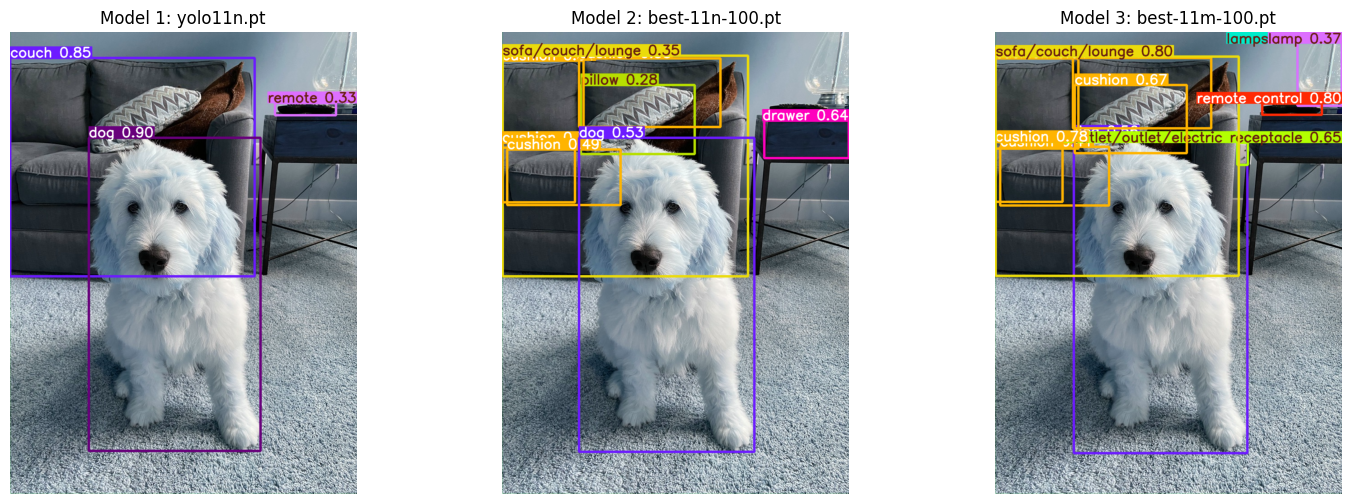

In [3]:
show_side_by_side("bailey.jpeg")

In [ ]:
show_side_by_side("bus.jpg")

In [ ]:
show_side_by_side("veggies.jpg")

In [ ]:
import torch

if torch.backends.mps.is_available():
    device = "mps"  # metal on macOS
elif torch.cuda.is_available():
    device = "cuda" # nvida GPU
else:
    device = "cpu"
    
print("Using device:", device)

In [ ]:
# Simple tensor operation on the selected device
x = torch.ones(1000, 1000, device=device)
y = torch.randn(1000, 1000, device=device)
z = x + y

print(f"Tensor z is on device: {z.device}")
print(f"z mean: {z.mean().item():.4f}")

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(data="coco8.yaml", epochs=3, device=device)

# results = model("bus.jpg")

# # Export the model to ONNX format
# success = model.export(format="onnx")

## LVIS

- LVIS data set will take long time to train.  
- Below is on macbook pro m4 with 16 CPU / 20 GPU cores / 48GB shared memory ... each epoch is ~ 4 hrs.

```bash
      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      25.3G      1.343      6.553      1.289        343        640:   5%|▍         | 308/6212 [12:30<3:59:54,  2.44s/it]
```

- use `tmux` to run detatched on workstation

- default batch=16 which causes crash on RTX 4070 Super so set batch=10
- Below results show ~ 18 min to complete 1 epoch on the workstation (~30 hrs for 100 epochs)

```bash
      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100       5.9G      1.568      3.702      1.425        159        640: 100%|__________| 9939/9939 [16:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|__________| 982/982 [01:41<00:00,  9.63it/s]
                   all      19626     244707      0.279     0.0493     0.0374      0.025
```



In [ ]:
# model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
# results = model.train(data="lvis.yaml", epochs=100, imgsz=640, device=device)

In [1]:
from ultralytics import YOLO

# Load ONNX model exported from Ultralytics
onnx_model = YOLO("../src-tauri/resources/models/yolo11n.onnx")

# Example inference with ONNX model
results = onnx_model("bailey.jpeg")
results[0].show()  # or results[0].plot() with matplotlib if you want to display in notebook

# You can compare ONNX results with PyTorch model results as well

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading ../src-tauri/resources/models/yolo11n.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x640 1 dog, 1 couch, 1 remote, 27.4ms
Speed: 3.1ms preprocess, 27.4ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
for box in results[0].boxes:
    print("xyxy:", box.xyxy.cpu().numpy())      # Bounding box coordinates
    print("confidence:", box.conf.cpu().numpy()) # Confidence score
    print("class:", box.cls.cpu().numpy())       # Class index

xyxy: [[     175.05      235.31      555.46      929.83]]
confidence: [    0.91403]
class: [         16]
xyxy: [[    0.53071       57.31      551.42      541.67]]
confidence: [    0.86733]
class: [         57]
xyxy: [[     587.97      157.42      719.86      184.24]]
confidence: [    0.38673]
class: [         65]


In [ ]:
import onnxruntime as ort
import numpy as np
from PIL import Image

# Load and preprocess image
def preprocess(img_path, input_shape=(640, 640)):
    img = Image.open(img_path).convert("RGB").resize(input_shape)
    img_np = np.array(img).astype(np.float32) / 255.0
    img_np = np.transpose(img_np, (2, 0, 1))  # HWC to CHW
    img_np = np.expand_dims(img_np, axis=0)   # Add batch dimension
    return img_np

# Load ONNX model
onnx_path = "../src-tauri/resources/models/yolo11n.onnx"
session = ort.InferenceSession(onnx_path)

# Prepare input
img_path = "../src-tauri/resources/images/bailey.jpeg"
input_tensor = preprocess(img_path)
input_name = session.get_inputs()[0].name
print(input_name)

# Run inference
# .run(None, {'data': image})
outputs = session.run(None, {input_name: input_tensor})

# Print output shape and a sample
output = outputs[0]
print("Output shape:", output.shape)
print("First prediction:", output.reshape(-1, output.shape[-1])[0])

images
Output shape: (1, 84, 8400)
First prediction: [     3.9996      13.536      19.753 ...      532.72      575.65      597.97]


In [20]:
# Transpose if needed so shape is (8400, 84)
if output.shape[1] == 84:
    output = np.transpose(output, (0, 2, 1))
output = output.reshape(-1, output.shape[-1])  # (8400, 84)

detected_items = []
conf_threshold = 0.00011  # adjust as needed

for row in output:
    x, y, w, h = row[:4]
    obj_conf = row[4]
    class_scores = row[5:]
    class_id = np.argmax(class_scores)
    class_conf = class_scores[class_id]
    score = obj_conf * class_conf
    if score > conf_threshold:
        detected_items.append({
            "bbox": [x, y, w, h],
            "score": float(score),
            "class_id": int(class_id)
        })

print(f"Detected {len(detected_items)} items:")
for item in detected_items:
    print(item)

Detected 10 items:
{'bbox': [np.float32(226.87762), np.float32(192.97102), np.float32(453.61493), np.float32(314.9913)], 'score': 0.00034433312248438597, 'class_id': 56}
{'bbox': [np.float32(227.71977), np.float32(210.04385), np.float32(452.08), np.float32(348.74286)], 'score': 0.0006277390639297664, 'class_id': 56}
{'bbox': [np.float32(229.15416), np.float32(191.24509), np.float32(458.66745), np.float32(312.38574)], 'score': 0.0002886294387280941, 'class_id': 56}
{'bbox': [np.float32(227.15572), np.float32(286.87772), np.float32(453.7629), np.float32(504.58893)], 'score': 0.0016149647999554873, 'class_id': 56}
{'bbox': [np.float32(227.71497), np.float32(302.08728), np.float32(452.1665), np.float32(535.344)], 'score': 0.0023487939033657312, 'class_id': 56}
{'bbox': [np.float32(226.95744), np.float32(291.4131), np.float32(450.67435), np.float32(512.86646)], 'score': 0.0015371167100965977, 'class_id': 56}
{'bbox': [np.float32(230.32573), np.float32(198.37473), np.float32(460.47586), np.f

In [11]:
print("Sample obj_conf:", [row[4] for row in output[:10]])
print("Sample max class_conf:", [np.max(row[5:]) for row in output[:10]])
print("Sample scores:", [row[4] * np.max(row[5:]) for row in output[:10]])

Sample obj_conf: [np.float32(1.1920929e-06), np.float32(2.0861626e-07), np.float32(2.0861626e-07), np.float32(2.0861626e-07), np.float32(3.5762787e-07), np.float32(3.5762787e-07), np.float32(4.7683716e-07), np.float32(5.364418e-07), np.float32(4.172325e-07), np.float32(3.5762787e-07)]
Sample max class_conf: [np.float32(6.2584877e-07), np.float32(2.3841858e-07), np.float32(2.3841858e-07), np.float32(2.3841858e-07), np.float32(3.2782555e-07), np.float32(2.9802322e-07), np.float32(3.5762787e-07), np.float32(4.172325e-07), np.float32(3.5762787e-07), np.float32(2.9802322e-07)]
Sample scores: [np.float32(7.4606987e-13), np.float32(4.973799e-14), np.float32(4.973799e-14), np.float32(4.973799e-14), np.float32(1.1723955e-13), np.float32(1.0658141e-13), np.float32(1.7053026e-13), np.float32(2.2382096e-13), np.float32(1.4921397e-13), np.float32(1.0658141e-13)]


In [22]:
import onnxruntime
session = onnxruntime.InferenceSession('../src-tauri/resources/models/yolo11n.onnx', None)

# get the name of the first input of the model
input_name = session.get_inputs()[0].name  

print('Input Name:', input_name)

Input Name: images


In [ ]:
%%time
outputs = [session.run([], {input_name: inputs[i]})[0] for i in range(test_data_num)]